# <center> LAB 8 - Pancakes With A Problem! </center>
<center>Harold Alfredo Díaz Ortiz</center>

# Punto 2

Modify the <a href="https://github.com/gjhernandezp/algorithms/blob/master/PancakesTrees.ipynb">PancakesTrees.ipynb</a>&nbsp;code leaving only the necessary code and data structures required to calculate the&nbsp;<em>Pn</em>&nbsp;and run the code for at least one night (8 hours) starting with&nbsp;<em>n=5</em>. What is the largest&nbsp;<em>Pn</em>&nbsp;calculated? (Save the results in drive to avoid losing them)

## Introducción

En este punto se exploran los valores de $P_n$ para algunos $n > 5$. Se tomará como base gran parte de los códigos planteados en el punto anterior.

In [ ]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [ ]:
def lstr(p):
    return ''.join([str(elem) for elem in p])

In [ ]:
def all_outputs(n):
    s = list(range(n, 0, -1))
    sorted_s = s[::-1]
    s_list = []
    queue = []
    queue.append(s) 
    s_list.append(s)

    while queue:
        s = queue.pop(0) 
        if s != sorted_s:
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d != s) and not(d in s_list):
                    queue.append(d)
                    s_list.append(d)
    return s_list

La optimización de código puede ser bastante compleja, y en efecto se puede ver aquí pese a ser absolutamente necesaria, dado que para números más grandes, nuestro procedimiento se vuelve cada vez más lento. Una razón para ello radica en la consecución de todas las posibles permutaciones para $n$, ya que existen $n!$ permutaciones posibles. Conforme aumenta $n$, este conjunto se vuelve notoriamente más grande, y al trabajar con datos cada vez mayores, el tiempo medido en los pasos computacionales necesarios para terminar nuestros algoritmos incrementa en similar medida (o incluso mayor). Por ello, se han realizado modificaciones en aras de disminuir ligeramente el tiempo de ejecución.

In [ ]:
def ModifiedBFSPreSolsLevel(s,sorted_arr,L):
        if s == sorted_arr:
          return 0

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        #G = pydot.Dot(graph_type="graph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
        list_edges = [] ###
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != sorted_arr) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if d == sorted_arr:
                    return l+1
                  list_edges.append([lstr(s),lstr(d)]) ###
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True
                elif lstr(d) not in graph[lstr(s)]: ###
                  graph[lstr(s)].append(lstr(d)) ###
                  if ([lstr(s),lstr(d)] and [lstr(d),lstr(s)]) not in list_edges: ###
                    list_edges.append([lstr(s),lstr(d)])
        return -1

## Sobre herramientas externas

Al trabajar con datos más grandes, la probabilidad de que nuestro algoritmo se vea interrumpido sin que se termine nuestro algoritmo es muy alta. Para no perder los datos obtenidos en el periplo descrito de 8 horas y en pro de no llenar las celdas de datos, se ha optado por escribir los datos pertinentes en archivos de texto aparte, los cuales aparecerán en este repositorio.

In [ ]:
def get_pn(n, limit, file):
  A = all_outputs(n)
  sorted_arr = A[0][::-1]
  arr = None
  p_n = -1
  for i in range(0, len(A)):
    aux = A[i]#[int(x) for x in A[i]]
    p_i = ModifiedBFSPreSolsLevel(aux, sorted_arr, limit)
    string = "Min number of flips for " + str(lstr(aux)) + ": " + str(p_i)
    file = write_on_file(file, string)
    if p_i > p_n:
      arr = A[i]
      p_n = p_i
  return arr, p_n

In [ ]:
def write_on_file(file, line):
  file.write(line+"\n")
  return file

Para la ejecución de las celdas de este notebook, se ha trabajado en Visual Studio Code contando una instalación previa de Jupyter Notebook con la configuración pertinente, y se ha dejado ejecutar todo el notebook durante toda una noche hasta la mañana (usando un total de más de 10 horas).

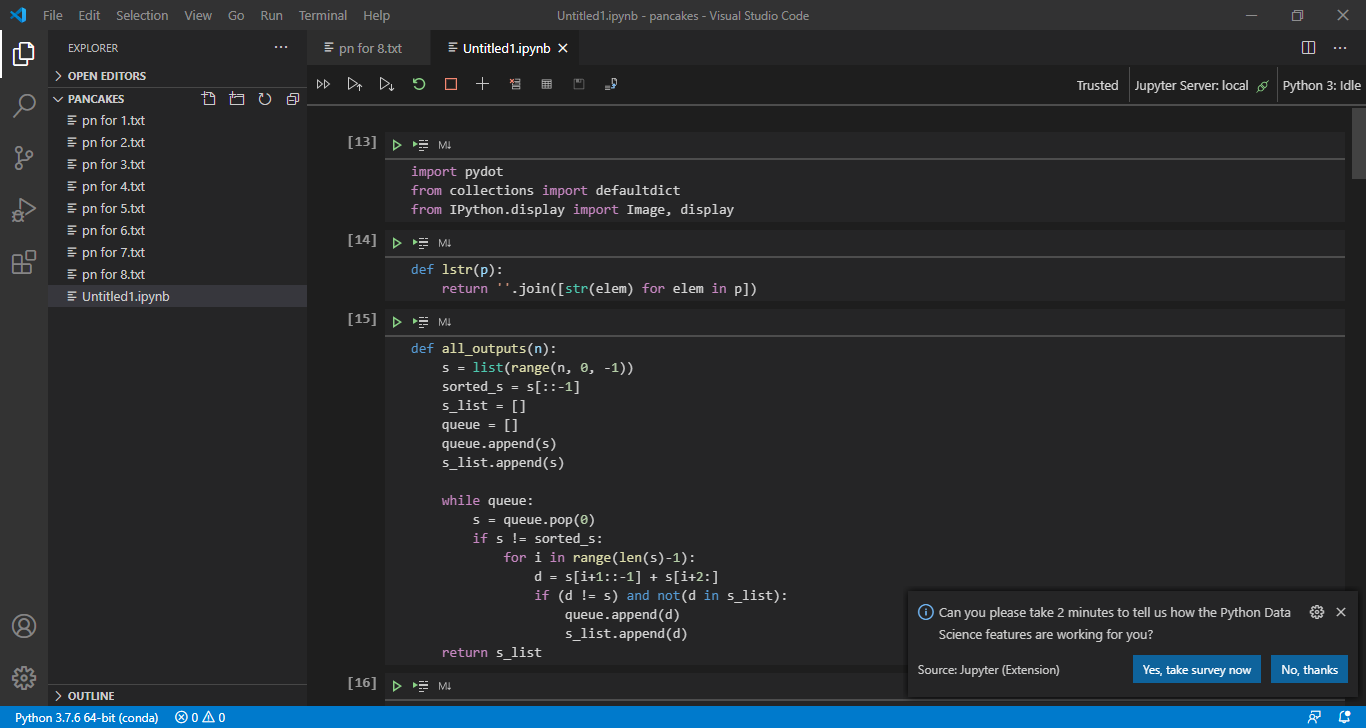

In [ ]:
pn_list = []
for i in range(5):
  file_name = "pn for " + str(i+1) + ".txt"
  file = open(file_name, "w")
  arr, p_n = get_pn(i+1, i+1, file)
  print("pn, n=", str(i+1), ": ", str(p_n), ". ", str(arr), sep="")
  pn_list.append([arr, p_n])

pn, n=1: 0. [1]
pn, n=2: 1. [2, 1]
pn, n=3: 3. [1, 3, 2]
pn, n=4: 4. [4, 2, 3, 1]
pn, n=5: 5. [2, 4, 3, 5, 1]


## Primeros inconvenientes

Se ha visto en el anterior punto que al ejecutar nuestro algoritmo con $n \leq 5$, este produce salidas con bastante rapidez. Y en efecto, al ejecutar esta celda obtendremos nuestros archivos de texto con suma prontitud y pocas líneas de texto. Sin embargo, esto cambia radicalmente cuando $n$ se hace más grande.

In [ ]:
n_start = 6
file_name = "pn for " + str(n_start) + ".txt"
file = open(file_name, "w")
limit = pn_list[-1][1]
limit = int((18/11)*limit) + 1
arr, p_n = get_pn(n_start, limit, file)
print("pn, n=", str(n_start), ": ", str(p_n), ". ", str(arr), sep="")
pn_list.append([arr, p_n])

pn, n=6: 7. [4, 6, 2, 5, 1, 3]


Desde $n=6$ notaremos que nuestro algoritmo puede necesitar algo más de tiempo para producir salidas. A partir de este inconveniente, modificamos el límite de iteraciones para generar todas las permutaciones y hallar $P_n$. A partir de <a href= http://datagenetics.com/blog/february42018/index.html> este artículo</a>, se conoce cuál es la cota máxima de $P_n$ hasta ahora conocida. Entonces, se tiene que $\frac{15}{14}n \leq P_n \leq \frac{18}{11}n$. Esto determinará nuestro límite máximo de iteraciones para obtener $P_n$ garantizando que para ninguna permutación la salida obtenida es $-1$.

In [ ]:
n_start = 7
file_name = "pn for " + str(n_start) + ".txt"
file = open(file_name, "w")
limit = pn_list[-1][1]
limit = int((18/11)*limit) + 1
arr, p_n = get_pn(n_start, limit, file)
print("pn, n=", str(n_start), ": ", str(p_n), ". ", str(arr), sep="")
pn_list.append([arr, p_n])

pn, n=7: 8. [3, 5, 2, 7, 4, 6, 1]


## Interrupción del programa

Una vez terminado nuestro tiempo, se interrumpió el programa cuando $n = 8$ al exceder el tiempo de espera estipulado y no estar cerca de completar el algoritmo para este $n$.

In [ ]:
n_start = 8
file_name = "pn for " + str(n_start) + ".txt"
file = open(file_name, "w")
limit = pn_list[-1][1]
limit = int((18/11)*limit) + 1
arr, p_n = get_pn(n_start, limit, file)
print("pn, n=", str(n_start), ": ", str(p_n), ". ", str(arr), sep="")
pn_list.append([arr, p_n])

KeyboardInterrupt: 

En efecto, veremos que para cuando se interrumpió el proceso aún faltaban líneas por registrar, y considerando que hay una línea de texto para cada permutación con su respectiva cantidad mínima de movimientos calculada, aún se necesitaba de mucho tiempo para obtener completamente $P_8$.

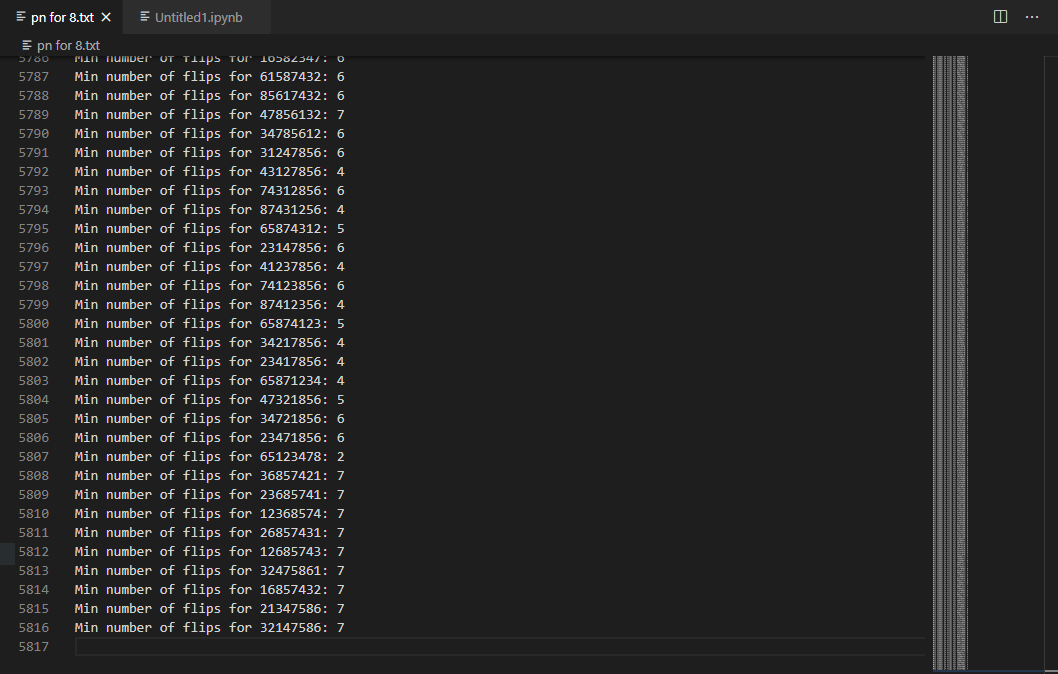

De las $40320 = 8!$ líneas estimadas, sólo se alcanzaron a obtener $5816$, aproximadamente una séptima parte de lo que se debería con el procedimiento completo.

## Conclusiones

Obtener $P_n$ para un $n$ lo suficientemente grande es una tarea ardua, y el que sólo se conozca hasta el $P_n$ de <a href=http://datagenetics.com/blog/february42018/index.html> 17</a> es bastante diciente. Seguramente con algo más de optimización se habría podido avanzar hasta algún $n > 7$, pero es evidente que por más que se intente este proceso, aún nos toparemos con un número de permutaciones equivalente a $n!$.

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/